Context

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality , I just shared it to kaggle for convenience. (If I am mistaken and the public license type disallowed me from doing so, I will take this down if requested.)
evaluations



Content


This dataset only has numeric variables:

1. fixed acidity: Influences wine flavor; low acidity may lead to flat taste; measured in g/dm³.
2. volatile acidity: Unpleasant if excessive; distilled before production ends; measured in g/dm³.
3. citric acid: Adds freshness, acts as preservative; mostly consumed in fermentation; measured in g/dm³.
4. residual sugar: Sugar left post-fermentation; balance affects sweetness; over 45 g/dm³ is sweet.
5. chlorides: Measures salt content in wine; excess can affect flavor.
6. free sulfur dioxide: Free SO₂ for preservation; excess causes pungent smell; measured in g/dm³.
7. total sulfur dioxide: Total SO₂ for quality preservation; prevents harmful bacteria; measured in mg/dm³.
8. density: Higher density indicates sweeter wines, measures sugar-to-alcohol conversion.
9. pH: Measures wine acidity from 0 (acidic) to 14 (basic), affecting balance and taste.
10. sulphates: Additive for antimicrobial and antioxidant properties; affects aroma and taste.
11. alcohol: Created by yeast in fermentation, usually measured as % ABV.
12. quality: Rated from 0 (poor) to 10 (excellent) based on expert evaluations



1. Random forest Classifier - An ensemble model which we'll use to train our model on
2. StandardScalar - in this project we're using support vector machine classification and this class cannot process the data given to it unless the data is standardized.
3. svm - the suport vector machine class in the sklearn package

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score , confusion_matrix 
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.metrics import classification_report

import warnings
warnings.simplefilter("ignore")

Now let's import our data! We're gonna use the wine quality dataset from the kaggle

In [6]:
wine = pd.read_csv("winequality-red.csv")


# Exploratory Data Analysis

In [8]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
wine.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5     6          4
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6     6          4
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0     7          4
               0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1     5          4
8.3            0.650             0.10         2.9             0.089      17.0                 40.0                  0.99803  3.29  0.55       9.5      5          3
                     

In [12]:
wine.shape

(1599, 12)

# Check missing values

In [14]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
# check all numerical columns in our dataset

numerical_col = wine.select_dtypes(include=["int64","float64"]).columns.tolist()
numerical_col

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [16]:
# check all categarical columns in our dataset

categarical_col = wine.select_dtypes(include=["object"]).columns.tolist()
print(categarical_col)

# not categarical column here!

[]


<Figure size 400x200 with 0 Axes>

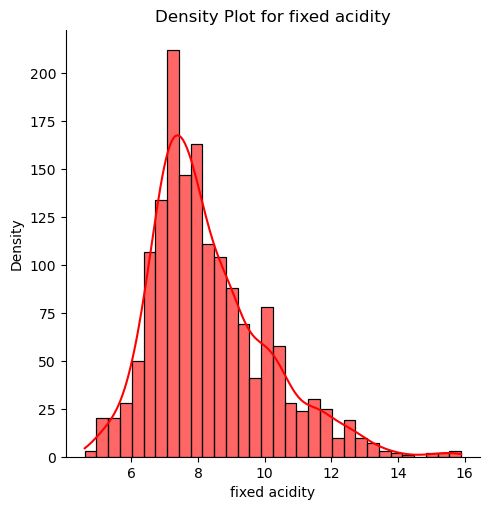

<Figure size 400x200 with 0 Axes>

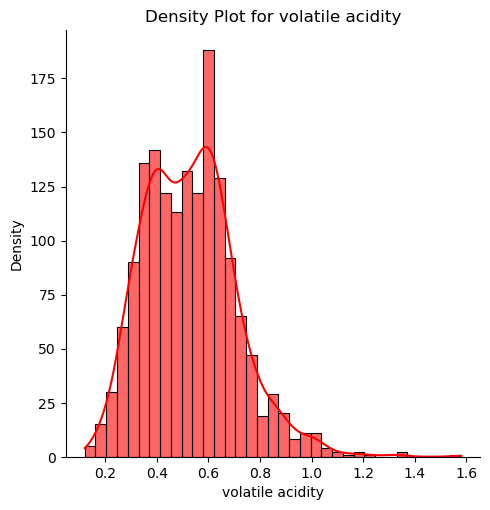

<Figure size 400x200 with 0 Axes>

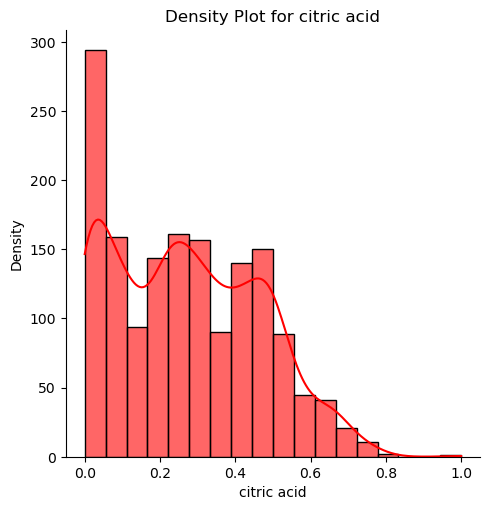

<Figure size 400x200 with 0 Axes>

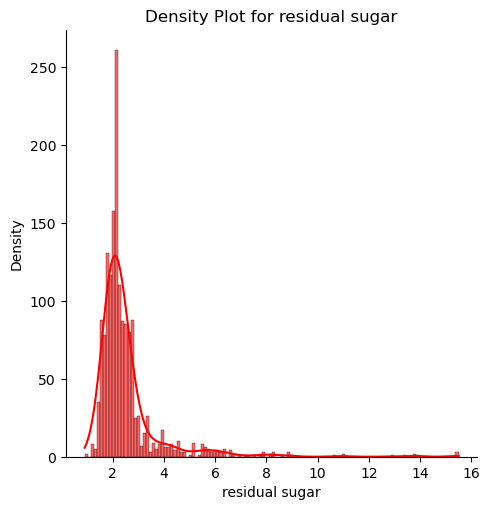

<Figure size 400x200 with 0 Axes>

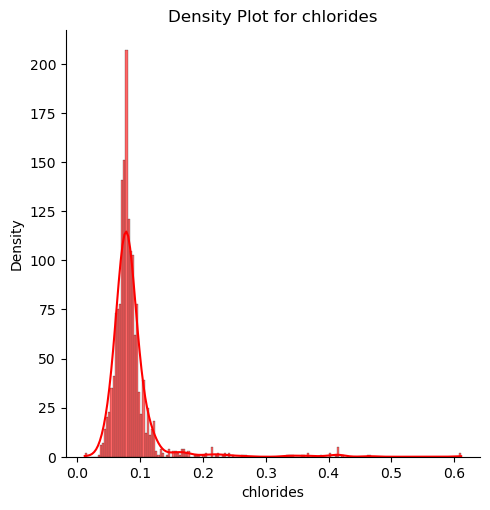

<Figure size 400x200 with 0 Axes>

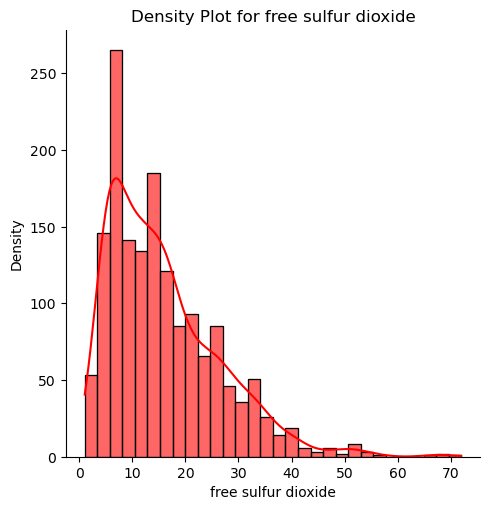

<Figure size 400x200 with 0 Axes>

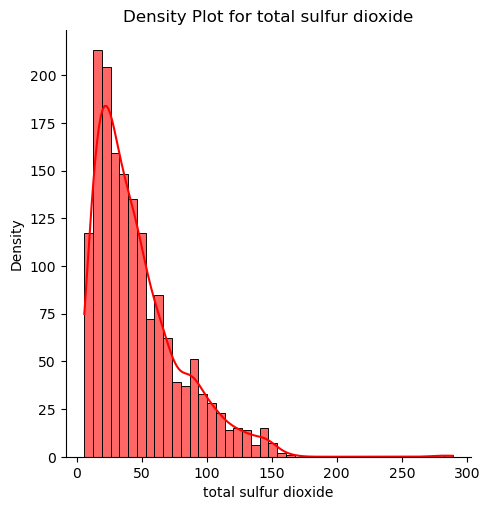

<Figure size 400x200 with 0 Axes>

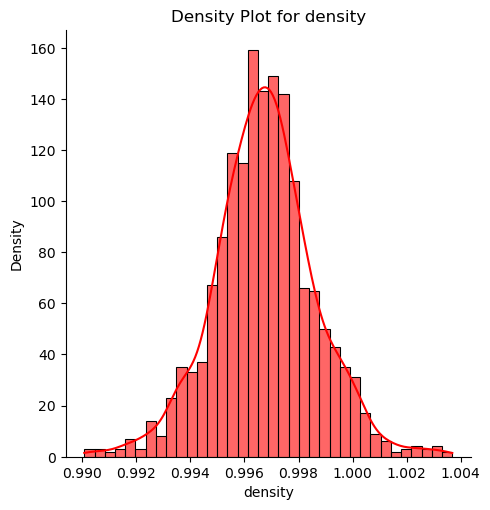

<Figure size 400x200 with 0 Axes>

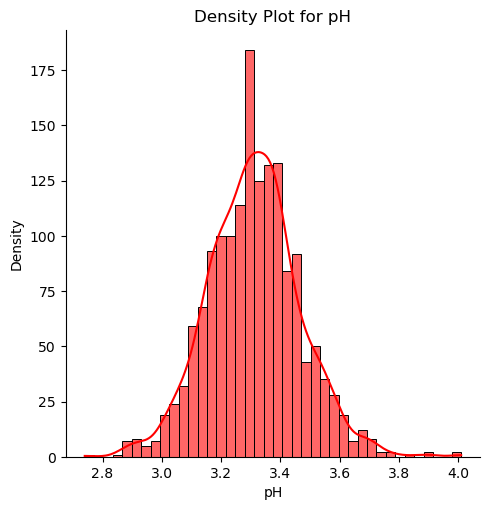

<Figure size 400x200 with 0 Axes>

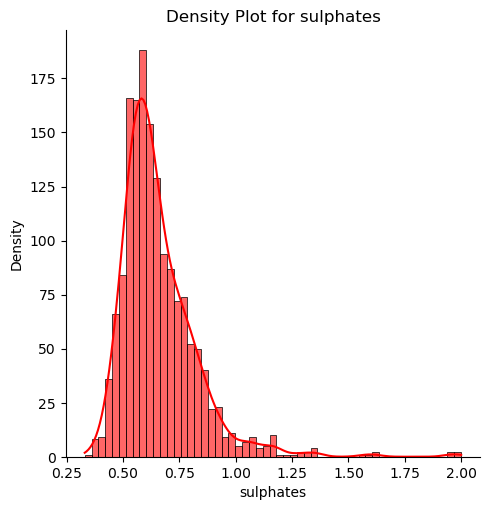

<Figure size 400x200 with 0 Axes>

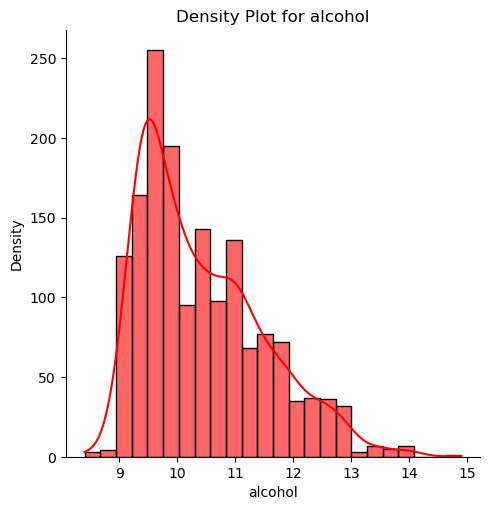

In [79]:
# Exclude 'quality' if it's the target variable

for column in wine.columns[:-1]:  
    plt.figure(figsize=(4,2))
    sns.displot(data=wine, x=column, fill=True, kde=True ,color="red", alpha=0.6)
    plt.title(f'Density Plot for {column}')
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()

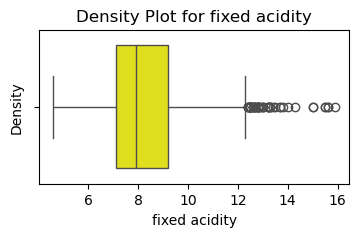

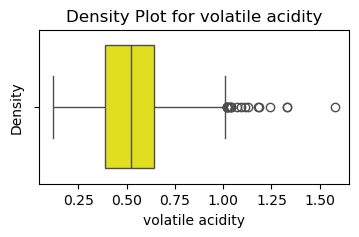

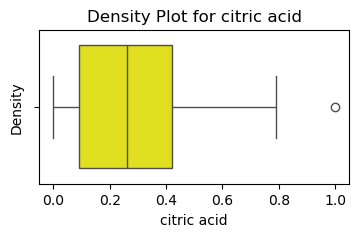

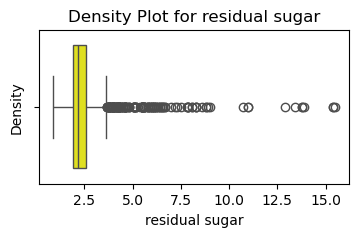

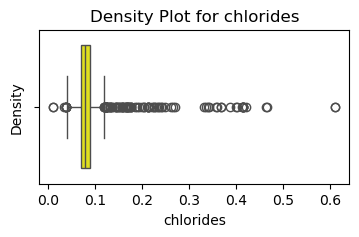

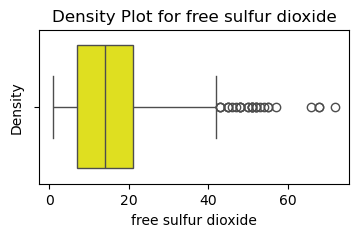

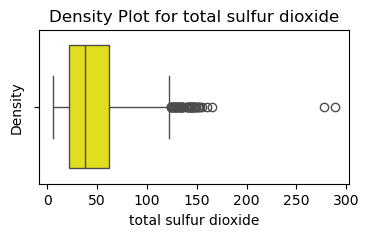

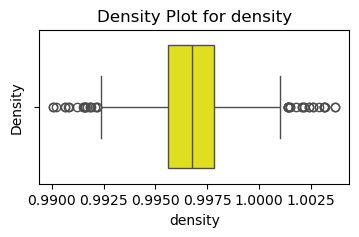

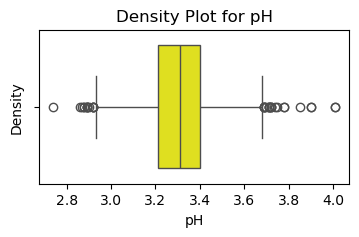

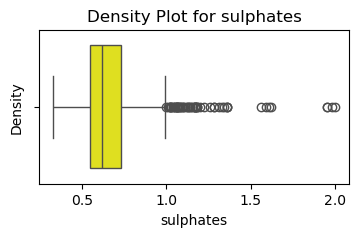

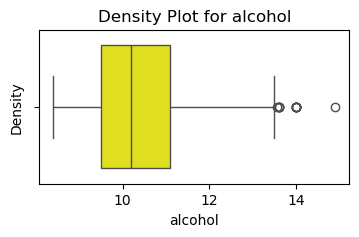

In [87]:
# wine.head(1)

for column in wine.columns[:-1]:  
    plt.figure(figsize=(4,2))
    sns.boxplot(data=wine, x=column, fill=True,color="yellow")
    plt.title(f'Density Plot for {column}')
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()

In [20]:
total_sulfur_dioxide_count = wine["total sulfur dioxide"].value_counts().sort_values(ascending=False).reset_index()
wine["total sulfur dioxide"].value_counts().sort_index(ascending=False)

total sulfur dioxide
289.0     1
278.0     1
165.0     1
160.0     1
155.0     1
         ..
10.0     27
9.0      14
8.0      14
7.0       4
6.0       3
Name: count, Length: 144, dtype: int64

In [21]:
# for the most part, free sulfur dioxide seems unusually low given the high levels of total sulfur dioxide for these records

wine[wine["total sulfur dioxide"] > 100]
wine.head(10).T

,0,1,2,3,4,5,6,7,8,9
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000,7.4000,7.9000,7.3000,7.8000,7.5000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000,0.6600,0.6000,0.6500,0.5800,0.5000
citric acid,0.0000,0.0000,0.040,0.560,0.0000,0.0000,0.0600,0.0000,0.0200,0.3600
residual sugar,1.9000,2.6000,2.300,1.900,1.9000,1.8000,1.6000,1.2000,2.0000,6.1000
chlorides,0.0760,0.0980,0.092,0.075,0.0760,0.0750,0.0690,0.0650,0.0730,0.0710
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000,13.0000,15.0000,15.0000,9.0000,17.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000,40.0000,59.0000,21.0000,18.0000,102.0000
density,0.9978,0.9968,0.997,0.998,0.9978,0.9978,0.9964,0.9946,0.9968,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100,3.5100,3.3000,3.3900,3.3600,3.3500
sulphates,0.5600,0.6800,0.650,0.580,0.5600,0.5600,0.4600,0.4700,0.5700,0.8000


In [22]:

percentage_high_sulfur = (wine[wine["total sulfur dioxide"]>110].shape[0] / wine.shape[0])*100

print(f"Percentage of the data with total sulfur dioxide > 100 :{percentage_high_sulfur:.2f}%")

Percentage of the data with total sulfur dioxide > 100 :5.38%


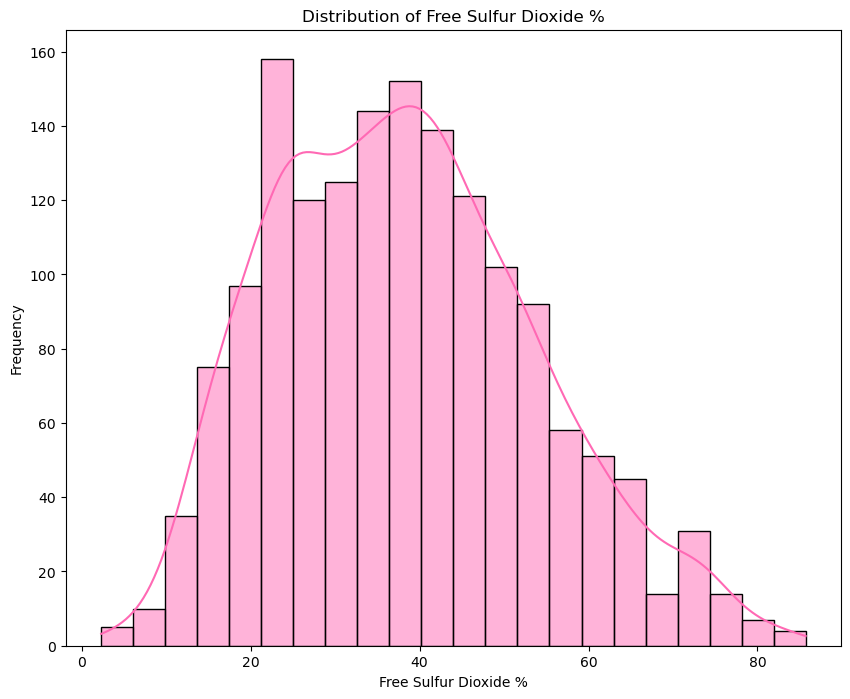

In [89]:
wine_sulfur_percent = pd.DataFrame()
wine_sulfur_percent['free sulfur dioxide %'] = wine['free sulfur dioxide'] / wine['total sulfur dioxide'] * 100
wine_sulfur_percent['quality'] = wine['quality'] 

plt.figure(figsize=(10, 8))
sns.histplot(wine_sulfur_percent['free sulfur dioxide %'], kde=True , color="hotpink")
plt.title('Distribution of Free Sulfur Dioxide %')
plt.xlabel('Free Sulfur Dioxide %')
plt.ylabel('Frequency')
plt.show()

# Analysis our target variable & its Distibution

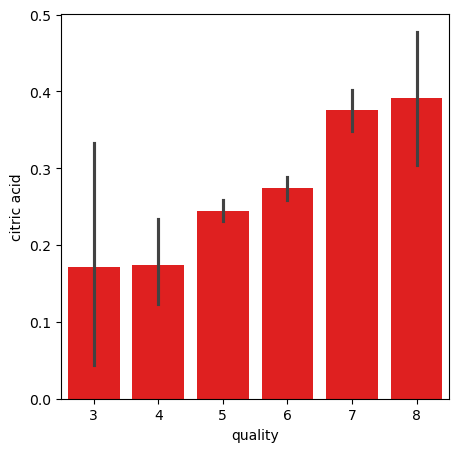

In [97]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine , color="red")
plt.show()

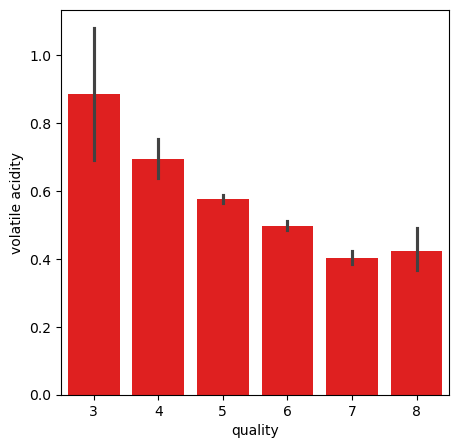

In [99]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine,color="red")
plt.show()

<Figure size 700x700 with 0 Axes>

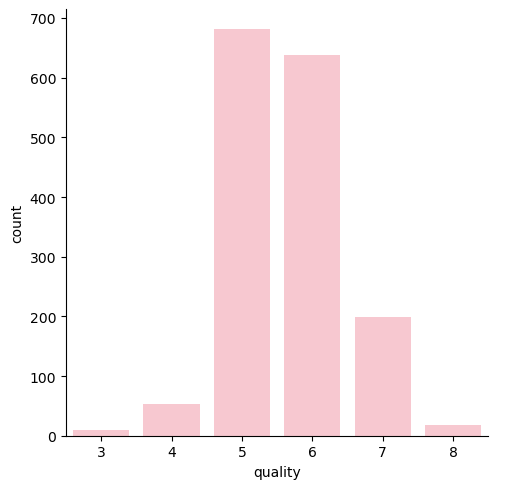

In [111]:
plt.figure(figsize=(7,7))
sns.catplot(x="quality" ,data=wine ,kind="count",color="pink")
plt.show()

In [28]:
quality_counts = wine["quality"].value_counts(normalize=True)*100
quality_counts = quality_counts.sort_index()
quality_counts =quality_counts.round(2)
quality_counts

quality
3     0.63
4     3.31
5    42.59
6    39.90
7    12.45
8     1.13
Name: proportion, dtype: float64

In [29]:
quality_counts = wine["quality"].value_counts().sort_index()
quality_counts

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

# Correlation analysis

corr - correlation calculated
square - To get a square form
fmt - we need one floating point value
annot - annotations on the sides!
cmap - color of the heatmap!

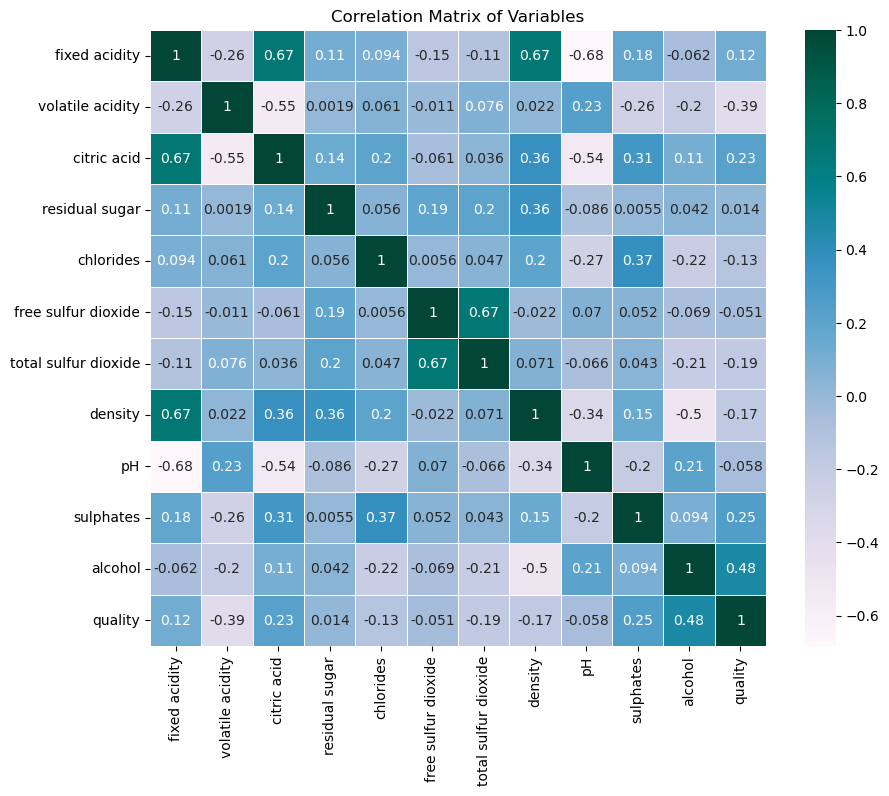

In [32]:
correlation_matrix = wine.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="PuBuGn" ,square=True, linewidths=0.5)
plt.title("Correlation Matrix of Variables")
plt.show()

# Our target variable is a ordinal categorical variable and so we can include it here. 

# Data Preprocessing!

For the quality values, we're gonna binarize the values to either good wine quality 1 or bad wine 0

In [35]:
x = wine.drop(columns=["quality"],axis=1)

y = wine['quality'].apply(lambda y_value: 1 if y_value>=7 else 0 )
print(y)

# Now that we have our data and labels, let's split the data into train and test split!
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x.shape,x_train.shape,x_test.shape)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64
(1599, 11) (1279, 11) (320, 11)


 <!-- scaler = StandardScaler()  ,x_train=scaler.fit_transform(x_train)  ,x_test = scaler.transform(x_test) -->

# Now let's train our model using Super Vector Machine

In [38]:
svm_model = SVC(kernel="linear")
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

# model Evaluation & Accuracy Score

In [40]:
y_train_prediction = svm_model.predict(x_train)
y_train_accuracy = accuracy_score(y_train_prediction,y_train)
print("Accuracy of the model on training data is: ", y_train_accuracy,"%")

Accuracy of the model on training data is:  0.8670836591086787 %


In [41]:
x_test_prediction = svm_model.predict(x_test)
test_accuracy = accuracy_score(x_test_prediction,y_test)
print("Accuracy of the model on testing data is: :", test_accuracy,"%")

Accuracy of the model on testing data is: : 0.853125 %


In [43]:
print(classification_report(y_test,x_test_prediction))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320



# Now let's train our model using random forest classifier 

In [45]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train , y_train)

RandomForestClassifier()

# model Evaluation & Accuracy Score

In [48]:
y_train_prediction = random_forest_model.predict(x_train)
y_train_accuracy = accuracy_score(y_train_prediction,y_train)
print("Accuracy of the model on training data is: ", y_train_accuracy,"%")


Accuracy of the model on training data is:  1.0 %


In [50]:
x_test_prediction = random_forest_model.predict(x_test)
test_accuracy = accuracy_score(x_test_prediction,y_test)
print("Accuracy of the model on testing data is: :", test_accuracy,"%")

Accuracy of the model on testing data is: : 0.903125 %


In [52]:
print(classification_report(x_test_prediction,y_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       282
           1       0.57      0.71      0.64        38

    accuracy                           0.90       320
   macro avg       0.77      0.82      0.79       320
weighted avg       0.91      0.90      0.91       320



#  visualizing the confusion matrix!

<Axes: >

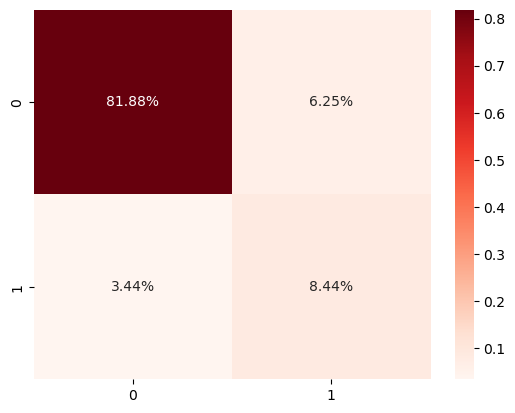

In [55]:

cf_matrix = confusion_matrix(x_test_prediction,y_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Reds')

In [63]:
# Convert the first row of the DataFrame to a Series
first_row_series = wine.iloc[0]

# Display the series
first_row_series

fixed acidity            7.4000
volatile acidity         0.7000
citric acid              0.0000
residual sugar           1.9000
chlorides                0.0760
free sulfur dioxide     11.0000
total sulfur dioxide    34.0000
density                  0.9978
pH                       3.5100
sulphates                0.5600
alcohol                  9.4000
quality                  5.0000
Name: 0, dtype: float64

Now that we've come to an end let's look back upon what we did in this project!

1. imported the required libraries!
2. read our data from the Red Wine Quality dataset!
3. Checked for any missing values!
4. Found some useful information between different features using plots and graphs!
5. Made a heatmap to find the correlation between different features!
6. Split the data into training and test sets!
7. Trained our model using supervised learning algorithm - Random forest classification & Super Vector Machine !

1. Accuracy of the Super vector machine model on testing data is 0.853125 %
2. Accuracy of the random forest classifier model on testing data is 0.896875 %